In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
169485,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,3.0,I've had this watch for a few days now. It syn...,13.0
169486,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,5.0,Been using it for almsot 2 days and haven't en...,3.0
169487,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,1.0,it's waaack,0.0
169488,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,4.0,My first smart watch. Not bad at all.,0.0


In [3]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0


In [4]:
df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
169485,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,3.0,I've had this watch for a few days now. It syn...,13.0
169486,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,5.0,Been using it for almsot 2 days and haven't en...,3.0
169487,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,1.0,it's waaack,0.0
169488,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,4.0,My first smart watch. Not bad at all.,0.0
169489,CNPGD [U.S. Warra,NaN,NaN,NaN,NaN,NaN


Shape: (169490, 6)

Columns: ['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes']

Missing values:
 Product Name        0
Brand Name      22897
Price            2642
Rating              1
Reviews            24
Review Votes     5290
dtype: int64


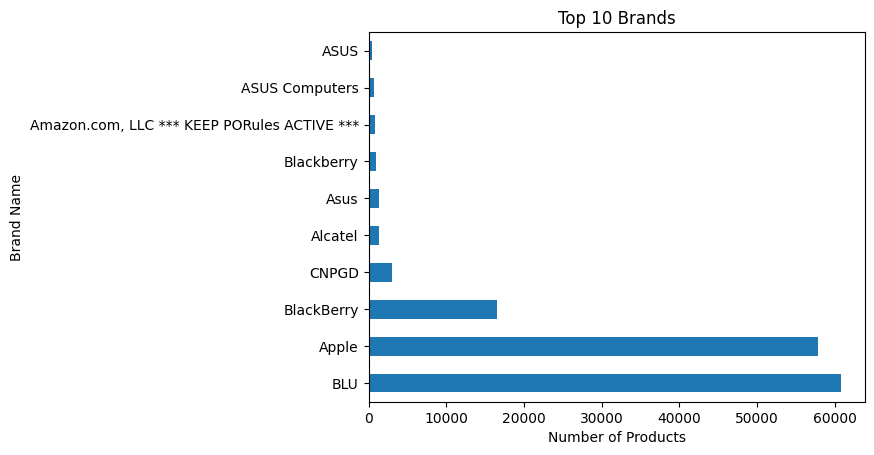

In [6]:
print('Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nMissing values:\n', df.isnull().sum())

# Plot top brands
df['Brand Name'].value_counts().head(10).plot(kind='barh', title='Top 10 Brands')
plt.xlabel('Number of Products')
plt.show()

In [10]:
df = df.dropna(subset=['Product Name', 'Reviews', 'Rating'])
df.drop_duplicates(subset=['Product Name', 'Reviews'], inplace=True)
df = df.reset_index(drop=True)

df['Product Name'] = df['Product Name'].str.strip()
df['Reviews'] = df['Reviews'].str.strip()
df = df[df['Reviews'].str.len() > 20]

# Limit to 5,000 samples for performance
df = df.head(5000)


In [12]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Reviews'])

cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('TF-IDF matrix shape:', tfidf_matrix.shape)

TF-IDF matrix shape: (5000, 9356)


In [15]:
def recommend(product_index, top_n=5):
    sim_scores = list(enumerate(cos_sim[product_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    product_indices = [i[0] for i in sim_scores]
    return df.iloc[product_indices][['Product Name', 'Brand Name', 'Rating']]

In [16]:
sample_index = 10
print("Original Product:", df.iloc[sample_index]['Product Name'])
recommend(sample_index)

Original Product: "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN


,Product Name,Brand Name,Rating
2627,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,5.0
1276,"Alcatel One Touch Fierce 2, 4GB, 5"" Screen, Un...",Alcatel,5.0
4780,Apple iPhone 3GS 8GB Black Factory Unlocked / ...,Apple,5.0
666,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,5.0
4551,Apple iPhone 3GS 8GB Black Factory Unlocked / ...,Apple,5.0
